In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
from scipy import ndimage
from matplotlib import pyplot
import scipy

# (1) load data

In [2]:
cd /home/siyan/projects/Synapse/data/cremi/gt-syn

/home/siyan/projects/Synapse/data/cremi/gt-syn


In [32]:
with h5py.File('syn_C_v2_200.h5','r') as f:
    syn_A = f['main'][:]

In [33]:
syn_A.shape

(153, 2036, 1986)

In [34]:
cd /home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label/C syn

/home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label/C syn


In [39]:
for i in range(153):
    print (i)
    scipy.misc.imsave(str(i)+'.png', img_A[i]+0.1*syn_A[i]+100*PrePost[i])

0


/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152


### Raw data (re-aligned)

In [3]:
cd /home/siyan/projects/Synapse/data/cremi/images

/home/siyan/projects/Synapse/data/cremi/images


In [4]:
with h5py.File('im_B_v2_200.h5','r') as f:
    img_A = f['main'][:]

In [5]:
img_A.shape

(153, 1748, 2069)

In [6]:
img_A.dtype

dtype('uint8')

In [7]:
img_A = img_A.astype(np.float64)

### Segmentation (re-aligned)

In [8]:
cd /home/siyan/projects/Synapse/data/cremi/aligned seg

/home/siyan/projects/Synapse/data/cremi/aligned seg


In [9]:
with h5py.File('B_v2_200.h5','r') as f:
    seg_A = f['main'][:]

In [10]:
seg_A.shape

(153, 1748, 2069)

In [20]:
del seg_A

### Pair (re-aligned)

In [11]:
cd /home/siyan/projects/Synapse/data/cremi/aligned pair

/home/siyan/projects/Synapse/data/cremi/aligned pair


In [12]:
with h5py.File('transformed_B_v2_200_pair.h5','r') as f:
    pair_A = f['main'][:]

In [13]:
pair_A.shape

(153, 1748, 2069)

In [14]:
uni = np.unique(pair_A)

In [15]:
np.where(uni==0)

(array([634]),)

In [16]:
uni[634]

0

In [14]:
len(uni)

1445

In [13]:
num = np.max(uni)

In [176]:
x = np.where(pair_A == 224)

In [177]:
x

(array([30], dtype=int64),
 array([1302], dtype=int64),
 array([1321], dtype=int64))

In [35]:
len(x)

1

In [16]:
num = np.unique(pair_A).shape[0]

In [23]:
del pair_A

### Print synapse_pair_label to visulize mislabeled pair

In [34]:
label = np.unique(pair_A[35:55])

In [37]:
label[126]

0

In [36]:
cd /home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label/C see

/home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label/C see


In [41]:
for i in tqdm(label[127:]):
    w1 = np.where(pair_A == i)  #pre
    z1 = w1[0][0]
    x1 = w1[1][0]
    y1 = w1[2][0]
    a = img_A[z1] 
    b = np.zeros(img_A[z1].shape)
    b[x1-15:x1+15,y1-15:y1+15] = 1
    scipy.misc.imsave(str(i)+'.png', a - 80*b)

1640


/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.


1764
1800
1849
1851
1853
1857
1859
1899
1901
1903
1906
1908
1930
1932
1934
1936
1940
1942
1944
1979
1981
1983
1995
2072
2078
2080
2082
2084
2753
2772
2775
2779
2781
2783
2790
2792
2794
2796
2799
2801
2803
2805
2810
2813
2856
2858
2860
2862
2871
2873
2875
2882
2887
2890
2892
2894
2896
2899
2901
2903
2905
2907
2909
2911
2913
2915
2917
2919
2921
2923
2925
2930
2932
2934
2936
2938
2940
2942
2944
3351
3353
3355
3364
3369
3373
3375
3377
3379
3381
3383
3385
3387
3389
3391
3393
3395
3397
3399
3401
3403
3405
3466
3468
3472
3474
3476
3478
3488
3490
3492
3494
3496
3498
3500
3502
3504
3507
3514
3528
3530
3534
3552
3558
3560


# (2) Main body

### main code

In [17]:
import math
ratio = [] # statistic of the ratio of r1/r2 
def CenterAndRadius(z1,x1,y1,z2,x2,y2):
    '''
    calculate the shape of expanded polarity mask according to the distance between pre-/post- point label and the cleft
    
    input: 
        (z1,x1,y1): [int] coordinate of postsynaptic label
        (z2,x2,y2): [int] coordinate of presynaptic label
    output:
        c: [tuple] coordinate of the center of both pre- and post- synaptic circle mask
        r1: [int] radius for postsynaptic circle mask
        r2: [int] radius for presynaptic circle mask
    '''
        
    c = (z1,x1,y1)
    r1 = 0
    r2 = 0
    D = ((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)**0.5
    lable1 = seg_A[z1,x1,y1]
    for i in range(100):
        d = 0.01 * i
        x = math.floor(d * (x2 - x1) + x1)
        y = math.floor(d * (y2 - y1) + y1)
        z = math.floor(d * (z2 - z1) + z1)
        lable = seg_A[z,x,y]
        if lable != lable1: 
            r1 = d * D
            c = (z,x,y)
            ratio.append(d)
            break
    r2 = D-r1
    r1 = min(max(r1,4.875),14.875)
    r2 = min(max(r2,4.875),14.875)
    return (c,r1,r2)

Text(0.5,1,'radius ratio of Post/Pre ')

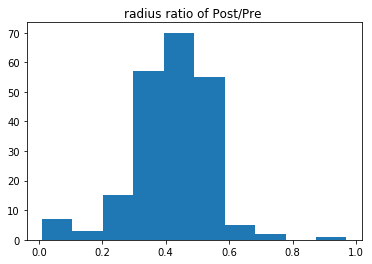

In [156]:
pyplot.hist(ratio)
pyplot.title('radius ratio of Post/Pre ')

In [1]:
PrePostMask = np.zeros(img_A.shape)
for i in tqdm(uni[635:]):
    
    #firstly, ignore those synapse with only pre or post label
    if len(np.where(uni == i)) == 0 or len(np.where(uni == -i)) == 0:
        continue
        
#   this is to reverse the pair label that is opposite of the gt
#   if i in [1979,1981,1983,3381,3383,3385,3387,3389,3391,3393,3395,3397,3399,3401,3403,3405]:
#       i = -i

    #get location of the pair label
    w1 = np.where(pair_A == -i)  #post
    z1 = w1[0][0]
    x1 = w1[1][0]
    y1 = w1[2][0]
    w2 = np.where(pair_A == i)  #pre
    z2 = w2[0][0]
    x2 = w2[1][0]
    y2 = w2[2][0]
    
    #get center and radius
    c,r1,r2 = CenterAndRadius(z1,x1,y1,z2,x2,y2)
    
    #dilate
    z = c[0]
    x = c[1]
    y = c[2]
    if z>=50 and z<=103:
        zMIN = z-50
        zMAX = z+50
    elif z<50:
        zMIN = 0
        zMAX = z+50
    else: 
        zMAX = 153
        zMIN = z-50
    mask = np.zeros((zMAX-zMIN,200,200))
    mask[z-zMIN,100,100] = 1
    resolution=(40.0, 4.0, 4.0)
    dt = ndimage.distance_transform_edt(1-mask, sampling=resolution)  #for pre-synapse
    IfSyn1 = (dt<=8*r1)
    SynArea1 = IfSyn1 * (1/(dt+1)) 
    IfSyn2 = (dt<=8*r2)
    SynArea2 = IfSyn2 * (1/(dt+1))
    
    #get coresponding segment
    seg1 = (seg_A[zMIN:zMAX,x-100:x+100,y-100:y+100] == seg_A[z1,x1,y1])
    seg2 = (seg_A[zMIN:zMAX,x-100:x+100,y-100:y+100] == seg_A[z2,x2,y2])
    
    #overlap
    o1 = SynArea1 * seg1
    o2 = SynArea2 * seg2
    
    #add this synapse to the PrePostMask
    PrePostMask[zMIN:zMAX,x-100:x+100,y-100:y+100] -= o1
    PrePostMask[zMIN:zMAX,x-100:x+100,y-100:y+100] += o2

NameError: name 'np' is not defined

In [19]:
#post processing
Pre = (PrePostMask > 0)
Post = -1*(PrePostMask < 0)
PrePost = Pre + Post

### save files and visualize

In [27]:
cd /home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label

/home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label


In [28]:
h5f = h5py.File('PrePostMask_B_v2_200.h5', 'w')
h5f.create_dataset('main', data=PrePost)

<HDF5 dataset "main": shape (153, 1748, 2069), type "<i8">

In [29]:
h5f.close()

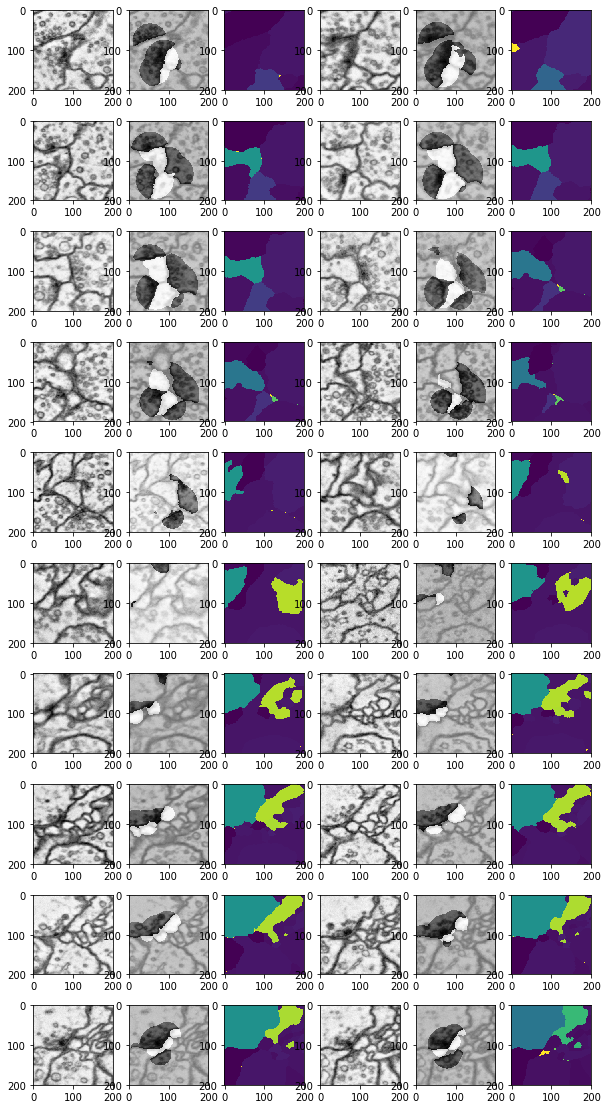

In [152]:
fig,ax = plt.subplots(10,6,figsize = (10,20))
for i in range(10):
    ax[i,0].imshow(255-img_A[25+2*i][x-100:x+100,y-100:y+100],cmap=cm.Greys)
    merge = 255-img_A[25+2*i][x-100:x+100,y-100:y+100]+100*PrePost[25+2*i][x-100:x+100,y-100:y+100]
    ax[i,1].imshow(merge,cmap=cm.Greys)
    ax[i,2].imshow(seg_A[25+2*i][x-100:x+100,y-100:y+100])
    ax[i,3].imshow(255-img_A[25+2*i+1][x-100:x+100,y-100:y+100],cmap=cm.Greys)
    merge = 255-img_A[25+2*i+1][x-100:x+100,y-100:y+100]+100*PrePost[25+2*i+1][x-100:x+100,y-100:y+100]
    ax[i,4].imshow(merge,cmap=cm.Greys)
    ax[i,5].imshow(seg_A[25+2*i+1][x-100:x+100,y-100:y+100])

In [28]:
cd /home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label/C new

/home/siyan/projects/Synapse/data/cremi/Task3 PrePost Label/C new


In [29]:
for i in tqdm(range(153)[35:55]):
    print (i)
    scipy.misc.imsave(str(i)+'.png', img_A[i]+100*PrePost[i])

35


/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


# (3) supplyment

### dilation method

cv2.dilation / ndimage.binary_dilation: too slow

In [20]:
image = np.zeros((100,100))
image[10,10] = 1

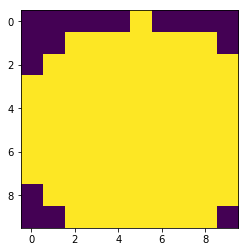

In [123]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
plt.imshow(kernel)

In [34]:
kernel

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=uint8)

In [35]:
dilated = cv2.dilate(image,kernel)

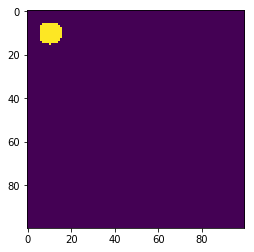

In [36]:
plt.imshow(dilated)

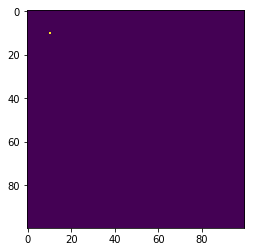

In [37]:
plt.imshow(image)

In [19]:
n = np.zeros((100,100,100))
n[30,30,30]=1
dilated =  ndimage.binary_dilation(n,structure = kernel,iterations = 1)

NameError: name 'kernel' is not defined

ndimage.distance_transform_edt: mostly commonly used

In [21]:
i = 1 - image

/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


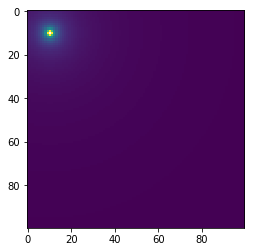

In [25]:
plt.imshow(1/dt)

In [26]:
np.max(1/dt)

/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

In [23]:
dt = ndimage.distance_transform_edt(i)

In [29]:
a = (dt<=10)

In [18]:
plt.imshow(1/a)

NameError: name 'a' is not defined

In [31]:
n = np.zeros((100,100,100))
n[30,30,30] = 1
dt = ndimage.distance_transform_edt(1-n)
a = (dt<=5)

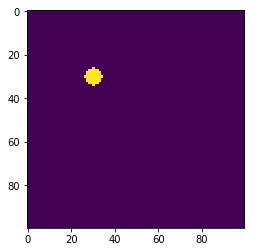

In [35]:
plt.imshow(a[27])

In [74]:
a= np.zeros((100,100,100))
a[30,30,30] = 1
dt = ndimage.distance_transform_edt(1-a)

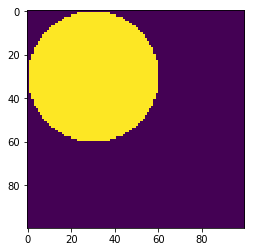

In [75]:
plt.imshow((dt[29]<30))